Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.2) 비트코인 시세 예측하기

### 바로가기

- [1. 시간정보가 포함된 데이터 살펴보기](#1.-시간정보가-포함된-데이터-살펴보기)
    - [market price 데이터셋의 기본 정보]
    - [시계열 데이터 살펴보기]
- [2. 파이썬 라이브러리를 활용한 시세 예측](#2.-파이썬-라이브러리를-활용한-시세-예측)
    - [Facebook Prophet 활용하기]
    - [ARIMA 모델 활용하기]
- [3. 분석 결과의 시각화](#3.-분석-결과의-시각화)
    - [시세 예측의 시각화]
- [4. 심화 부록](#4.-심화-부록)
    - [LSTM 모델을 활용한 시계열 예측]
    - [예측 모델을 평가해보자]
- [재미로 알아보는 내일의 비트코인 시세](#재미로-알아보는-내일의-비트코인-시세)
- [부록 : 선배의 Summary](#부록-:-선배의-Summary)

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 시간정보가 포함된 데이터 살펴보기

### [market price 데이터셋의 기본 정보]

In [22]:
# Data Source : https://www.blockchain.com/ko/charts/market-price?timespan=60days

url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/market-price.csv'
bitcoin_df = pd.read_csv(url, names = ['day', 'price'])

In [23]:
print(bitcoin_df.shape)
print(bitcoin_df.info())

(365, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
day      365 non-null object
price    365 non-null float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB
None


In [24]:
bitcoin_df.head()

,day,price
0,2017-08-27 00:00:00,4354.308333
1,2017-08-28 00:00:00,4391.673517
2,2017-08-29 00:00:00,4607.985450
3,2017-08-30 00:00:00,4594.987850
4,2017-08-31 00:00:00,4748.255000


-----

### [시계열 데이터 살펴보기]

In [18]:
bitcoin_df['day'] = pd.to_datetime(bitcoin_df['day'])
bitcoin_df.index = bitcoin_df['day']
bitcoin_df.set_index('day', inplace=True)
bitcoin_df.head()

,price
day,
2017-08-27,4354.308333
2017-08-28,4391.673517
2017-08-29,4607.985450
2017-08-30,4594.987850
2017-08-31,4748.255000


In [25]:
bitcoin_df.describe()

,price
count,365.000000
mean,8395.863578
std,3239.804756
min,3319.630000
25%,6396.772500
50%,7685.633333
75%,9630.136277
max,19498.683333


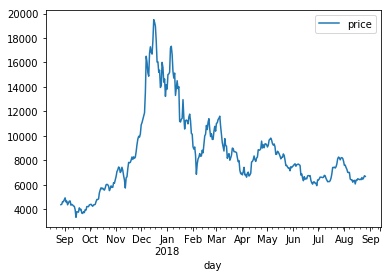

In [19]:
bitcoin_df.plot()
plt.show()

-----

# 2. 파이썬 라이브러리를 활용한 시세 예측

### [Facebook Prophet 활용하기]